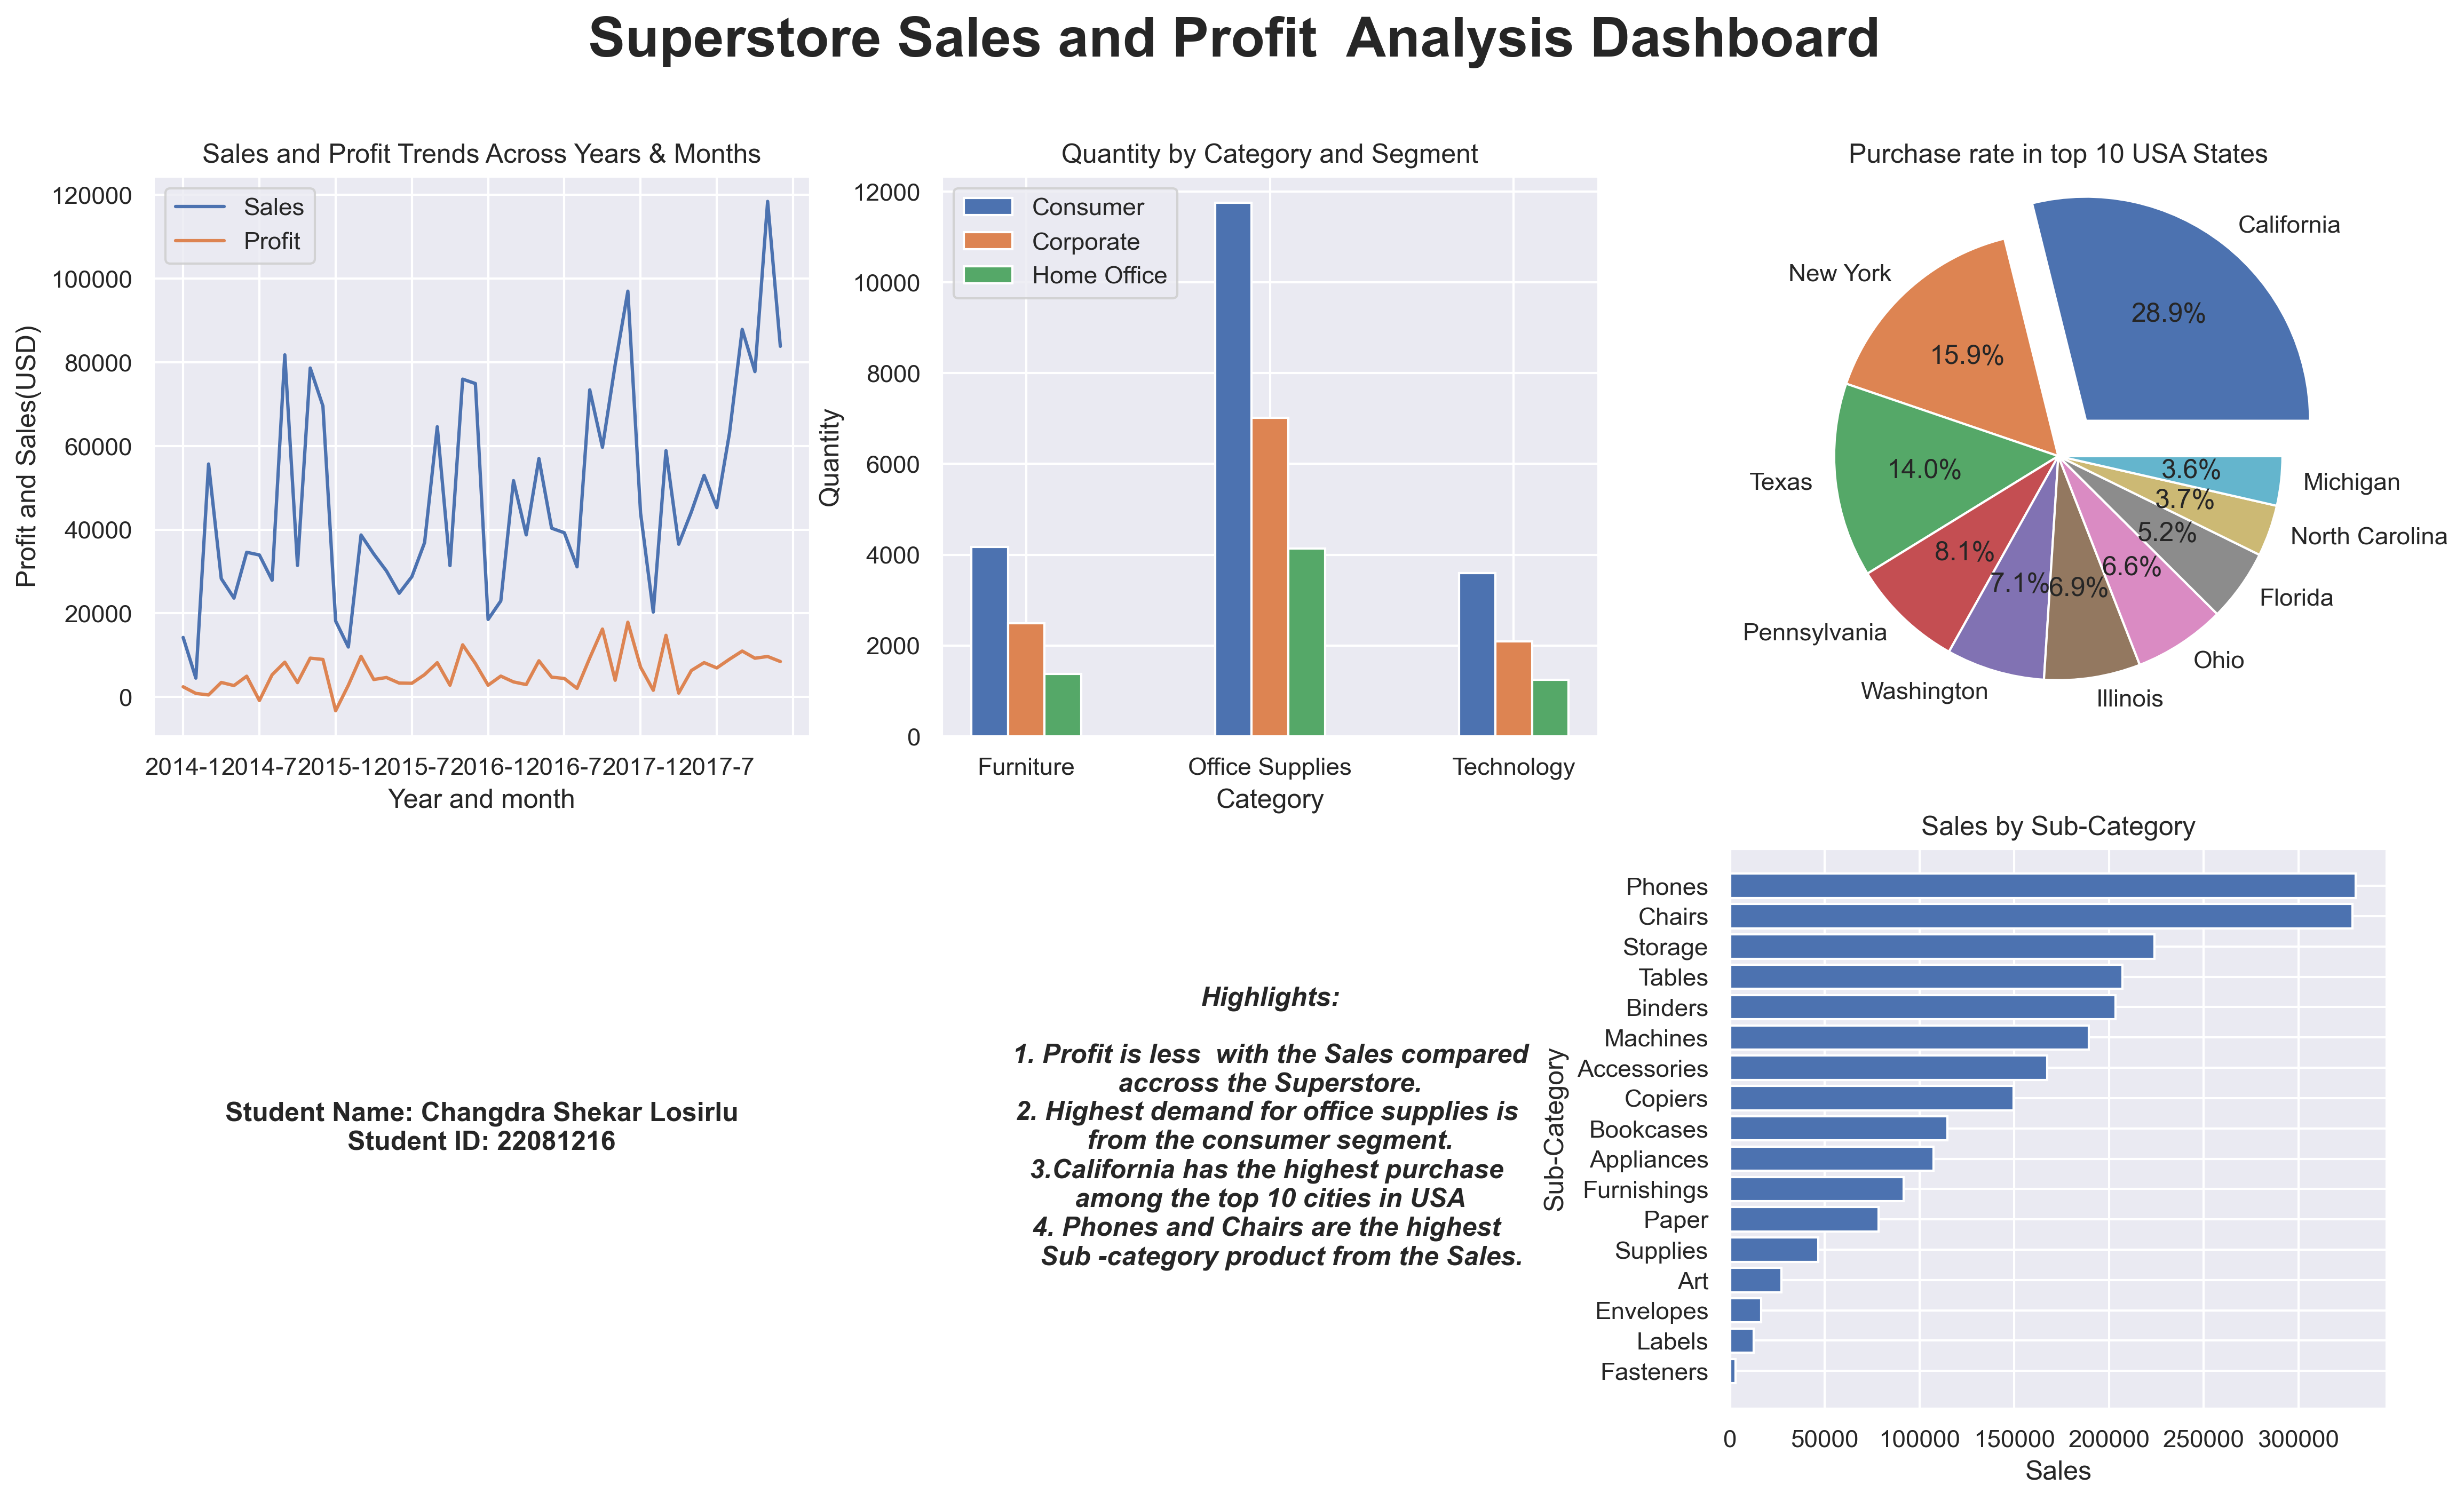

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 10 14:34:53 2024

@author: losir
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

# Plot 1 Sales and Profit Trends across years and months.


def plot_line(store, grid):
    """
    It will takes the sales and profit from csv file and plot the line graph
    according to the rescpective year and month.

    Parameters
    ----------
    store : It is a csv file containing the store data
        It will read the csv file containing the data of the store.
    grid : It is a Subplot type
        It is used for specifying the grid position.

    Returns
    -------
    None.

    """
    # It will produce subplot for sales and trends accross years and months.
    plt.subplot(grid[0, 0])
    # grouping the sales and profit according to month and year.
    month_sales = store.groupby(['year', 'month'])['Sales'].sum().reset_index()
    month_profit = store.groupby(['year', 'month'])[
        'Profit'].sum().reset_index()
    month_sales['year_month'] = month_sales['year'].astype(str) + '-' \
        + month_sales['month'].astype(str)
    month_profit['year_month'] = month_profit['year'].astype(str) + '-'\
        + month_profit['month'].astype(str)
    # Set the figure Size.
    a_x = sns.lineplot(data=month_sales, x="year_month", y="Sales",
                       label="Sales")
    a_x = sns.lineplot(data=month_profit, x="year_month", y="Profit",
                       label="Profit")
    # plot the xlabel, ylabel and title.
    plt.xlabel("Year and month")
    plt.ylabel("Profit and Sales(USD)")
    plt.title("Sales and Profit Trends Across Years & Months")
    # It is major ticks on the x-axis should be located at multiples of 6.
    a_x.xaxis.set_major_locator(ticker.MultipleLocator(6))


# plot 2 Quantity by Category and Segment.
def bar_plot_v(store, grid):
    """
    It will takes the category and segment with respective to Quantity  
    from csv file and plot the bar graph.

    Parameters
    ----------
    store : It is a csv file containing the store data.
        It will read the csv file containing Quantity,Category and Segment 
        data of the store.
    grid :  It is a Subplot type
        It is used for specifying the grid position.

    Returns
    -------
    None.

    """
    plt.subplot(grid[0, 1])
    store = pd.DataFrame(store)

    # Group by 'Category' and 'Segment' and sum the 'Quantity'
    grouped_store = store.groupby(['Category', 'Segment'])[
        ['Quantity']].sum().reset_index()

    # Create a bar plot using plt.bar
    categories = grouped_store['Category'].unique()
    bar_width = 0.15  # Width of each bar
    index = range(len(categories))

    for i, segment in enumerate(grouped_store['Segment'].unique()):
        segment_data = grouped_store[grouped_store['Segment'] == segment]
        plt.bar([pos + i * bar_width for pos in index],
                segment_data['Quantity'], width=bar_width, label=segment)

    # Adding labels and title
    plt.legend(loc='upper left')
    plt.xlabel('Category')
    plt.ylabel('Quantity')
    plt.title('Quantity by Category and Segment')

    # Adding x-axis labels and legend
    plt.xticks([pos + bar_width for pos in index], categories)
# plot 3 Purchases rates in Top 10 USA States.
def pie_plot(store, grid):
    """
    It will takes the purchases  with respective to top 10 states 
    from csv file and plot the pie  graph.

    Parameters
    ----------
    store : It is a csv file containing the store data.
        It will read the csv file containing top 10 USA States from 
        data of the store.
    grid :  It is a Subplot type
        It is used for specifying the grid position.

    Returns
    -------
    None.

    """
    # It will produce subplot for Top 10 States with highest purchase rate.
    plt.subplot(grid[0, 2])
    # Group the data to filter State with Quantity
    store = pd.DataFrame(store.groupby('State')[
                         'Quantity'].sum().reset_index())
    # Filter the data to get top 10 purchase State.
    store = store.sort_values('Quantity', ascending=False).head(10)
    # Explode the pie Chart
    explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    # Plot the pie plot
    plt.pie(store['Quantity'], labels=store['State'], explode=explode,
            autopct='%1.1f%%')
    # Add the title
    plt.title('Purchase rate in top 10 USA States')

# plot 4
def bar_plot(store, grid):
    """
    It will takes the Sub-Category with Sales data from csv file and
    plot the pie  graph.
    Parameters
    ----------
    store : It is a csv file containing the store data.
        It will read the csv file containing  Sub_categories with Sales data
        from the data set.
    grid :  It is a Subplot type
        It is used for specifying the grid position.

    Returns
    -------
    None.

    """
    data_store = plt.subplot(grid[1, 2])
    # Creating a DataFrame with sub-category sales data.
    store = pd.DataFrame(store)
    # Filter the data.
    sub_store = store.groupby('Sub-Category',
                        as_index=False)['Sales'].sum().sort_values(by='Sales')
    # Plot the bar.
    data_store.barh(sub_store['Sub-Category'], sub_store['Sales'])
    # Add the Labels.
    data_store.set_xlabel('Sales')
    data_store.set_ylabel('Sub-Category')
    # add the tile.
    data_store.set_title('Sales by Sub-Category')


def print_detail():
    """
    It is used to highlights points and name and Student ID.
    Returns
    -------
    None.

    """
    # Add a subplot for highlights.
    # Plot the grid for Highlights.
    plt.subplot(grid[1, 1])
    # Add the Highlights of the Dashboard.
    text = "Highlights:\n\n" \
           "1. Profit is less  with the Sales compared\n"\
        "accross the Superstore.\n" \
           "2. Highest demand for office supplies is \n"\
        "from the consumer segment.\n" \
           "3.California has the highest purchase \n"\
        " among the top 10 cities in USA \n" \
           "4. Phones and Chairs are the highest \n" \
           "   Sub -category product from the Sales."
    # Add Text format of Highlights.
    plt.text(0.5, 0.5, text, ha='center', va='center', fontsize=12,
              fontstyle='italic', fontweight='bold')
    plt.axis('off')

    # Add Student Name and ID.
    plt.subplot(grid[1, 0])
    text = "Student Name: Changdra Shekar Losirlu\n" \
           "Student ID: 22081216"
    # Add Text format of Studend name and ID.
    plt.text(0.5, 0.5, text, ha='center', va='center',
             fontsize=12, fontweight='bold')
    plt.axis('off')

    # Main title for the entire dashboard.
    fig.suptitle('Superstore Sales and Profit  Analysis Dashboard',
                 fontsize=25, fontweight='bold')


#######################Main ##########################


store = pd.read_csv("Sample - Superstore.csv")
store['Order Date'] = store['Order Date'].str.replace('-', '/')
store['Ship Date'] = store['Ship Date'].str.replace('-', '/')
store['Order Date'] = pd.to_datetime(store['Order Date'], format='%m/%d/%Y')
store['Ship Date'] = pd.to_datetime(store['Ship Date'], format='%m/%d/%Y')
store['year'] = store['Order Date'].dt.year
store['month'] = store['Order Date'].dt.month
#Plot the Dashboard
fig = plt.figure(figsize=(18, 10), dpi=300)
grid = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
sns.set_theme()
plot_line(store, grid)
bar_plot_v(store, grid)
pie_plot(store, grid)
bar_plot(store, grid)
print_detail()
#Save the Image with ID.png
plt.savefig('22081216.png', dpi=300)
# plt.show()
